<a href="https://colab.research.google.com/github/victor-divo/tugas-kuliah-usm/blob/main/data-mining/Praktikum_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Victor Divo Mahendra  
NIM : G.231.22.0083

# **Supervised Learning (Random Forest Classifier)**

In [45]:
# Persiapan File untuk sumber data
from google.colab import files
uploaded = files.upload()

Saving anemia_dataset.csv to anemia_dataset.csv


In [46]:
# Import data menjadi dataframe
import pandas as pd

dataset = pd.read_csv("anemia_dataset.csv")
num_rows = len(dataset)
print(f"Jumlah baris: {num_rows}")
dataset.head()

Jumlah baris: 104


,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Preprocessing data, hapus kolom yang tidak dipakai
dfSp = dataset.drop(['Number', 'Name'], axis=1)
dfSp = dfSp.dropna(axis=1).reset_index().drop('index', axis=1)
num_rows = len(dfSp)
print(f"Jumlah baris: {num_rows}")
dfSp.head()

Jumlah baris: 104


,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,43.2555,30.8421,25.9025,6.3,Yes
1,45.6033,28.1900,26.2067,13.5,No
2,45.0107,28.9677,26.0215,11.7,No
3,44.5398,28.9899,26.4703,13.5,No
4,43.2870,30.6972,26.0158,12.4,No


In [51]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into features and target variable
X = dfSp.drop(columns='Anaemic')
y = dfSp ['Anaemic']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        25
         Yes       1.00      1.00      1.00         7

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



# **Unsupervised Learning (K-Means Clustering)**

In [52]:
# Persiapan File untuk sumber data
from google.colab import files
fileUpload = files.upload()

Saving customer_segmentation_data.csv to customer_segmentation_data.csv


In [53]:
# Import data menjadi dataframe
import pandas as pd

df = pd.read_csv("customer_segmentation_data.csv")
num_rows = len(df)
print(f"Jumlah baris: {num_rows}")
df.head()

Jumlah baris: 1000


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [77]:
# Preprocessing data, hapus kolom yang tidak dipakai
dfUsp = df.drop(['id', 'age', 'gender', 'preferred_category'], axis=1)
dfUsp["income"] = df["income"].div(1000)
dfUsp = dfUsp.dropna().reset_index().drop('index', axis=1)
num_rows = len(dfUsp)
print(f"Jumlah baris: {num_rows}")
dfUsp.head()

Jumlah baris: 1000


,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,99.342,90,3,24,113.53
1,78.852,60,2,42,41.93
2,126.573,30,2,28,424.36
3,47.099,74,9,5,991.93
4,140.621,21,3,25,347.08


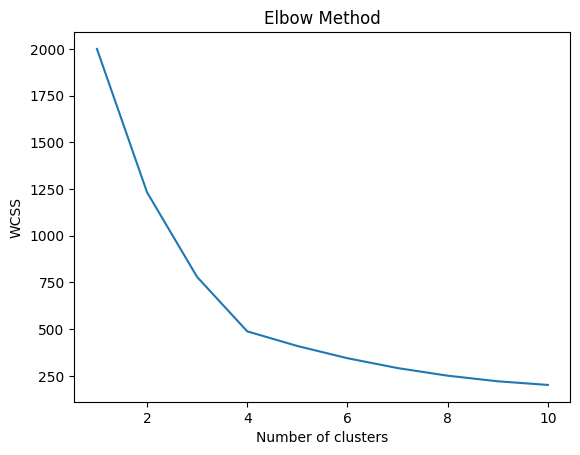

In [90]:
# Import Library yang dibutuhkan
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Mengambil feature yang berhubungan
X = dfUsp.iloc[:, [0,1]].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mencari jumlah cluster paling optimal dengan metode elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Tampilkan grafil elbownya
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


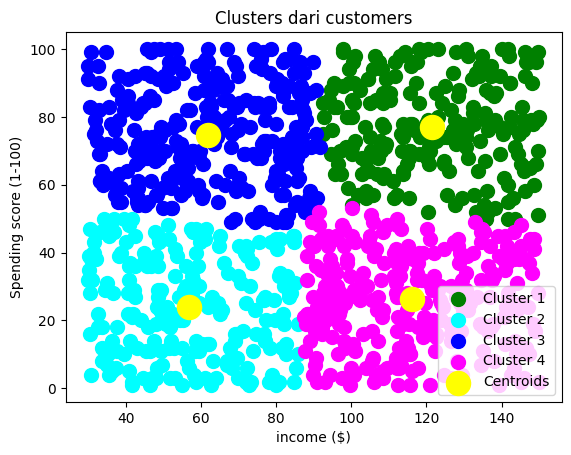

In [91]:
# Melakukan modelling kmeans dengan 4 cluster
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

# visualisasi kluster
colors = ['green', 'cyan', 'blue', 'magenta']

for i in range(0,4):
  plt.scatter(X[y_kmeans == i,0], X[y_kmeans == i,1],s=100,c=colors[i],label=f"Cluster {i + 1}")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow',label='Centroids')

plt.title('Clusters dari customers')
plt.xlabel('income ($)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()